### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# 1. Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
# 2. Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'],axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# 3. Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [6]:
# Create bins for "ASK_AMT" column
bins = [0, 5000, 10000, 100000, 1000000, 10000000, 10000000000]
# Create labels for the bins
group_labels = ["0 to 5k", "5K to 10K", "10K to 100K", "100K to 1M", "1M to 10M", "over 10M"]

In [7]:
# Slice the data and place it into bins
pd.cut(application_df["ASK_AMT"], bins, labels=group_labels).head()

0       0 to 5k
1    100K to 1M
2       0 to 5k
3     5K to 10K
4    100K to 1M
Name: ASK_AMT, dtype: category
Categories (6, object): ['0 to 5k' < '5K to 10K' < '10K to 100K' < '100K to 1M' < '1M to 10M' < 'over 10M']

In [8]:
# Place the data series into a new column inside of the DataFrame
application_df["ASK_AMT_GROUP"] = pd.cut(application_df["ASK_AMT"], bins, labels=group_labels)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,ASK_AMT_GROUP
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0 to 5k
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,100K to 1M
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0 to 5k
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,5K to 10K
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100K to 1M


In [9]:
application_df = application_df.drop(['ASK_AMT'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_GROUP
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0 to 5k
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100K to 1M
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0 to 5k
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5K to 10K
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100K to 1M
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,0,0 to 5k
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0 to 5k
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,0,0 to 5k
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,1,0 to 5k


In [20]:
application_df.dtypes

APPLICATION_TYPE            object
AFFILIATION                 object
CLASSIFICATION              object
USE_CASE                    object
ORGANIZATION                object
STATUS                       int64
INCOME_AMT                  object
SPECIAL_CONSIDERATIONS      object
IS_SUCCESSFUL                int64
ASK_AMT_GROUP             category
dtype: object

In [21]:
application_df['ASK_AMT_GROUP'] = application_df['ASK_AMT_GROUP'].astype('object')
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
ASK_AMT_GROUP             object
dtype: object

In [22]:
# 4. Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
app_type_counts

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

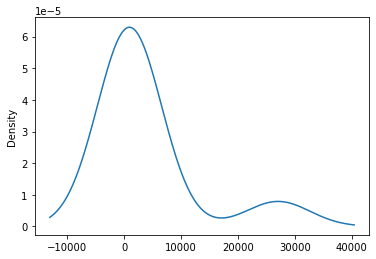

In [23]:
# 5. Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [24]:
# 6. Determine which values to replace
AppTypeReplace = list(app_type_counts[app_type_counts < 500].index)

# Replace in DataFrame
for app in AppTypeReplace:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")


# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [25]:
# 7. Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

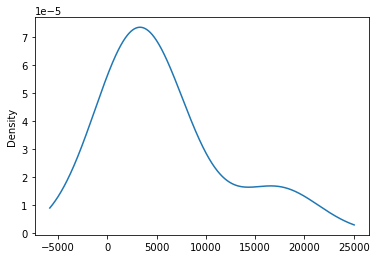

In [26]:
# 7.1. Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [27]:
# 7.2. Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [28]:
# 7.3. Generate our categorical variable lists
type_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
type_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT_GROUP']

In [29]:
# 8. Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[type_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(type_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_GROUP_0 to 5k,ASK_AMT_GROUP_100K to 1M,ASK_AMT_GROUP_10K to 100K,ASK_AMT_GROUP_1M to 10M,ASK_AMT_GROUP_5K to 10K,ASK_AMT_GROUP_over 10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
# 9. Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(type_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_GROUP_0 to 5k,ASK_AMT_GROUP_100K to 1M,ASK_AMT_GROUP_10K to 100K,ASK_AMT_GROUP_1M to 10M,ASK_AMT_GROUP_5K to 10K,ASK_AMT_GROUP_over 10M
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
# 10. Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
len(X)

34299

### Deliverable 2: Compile, Train and Evaluate the Model

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3920      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,381
Trainable params: 6,381
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback]) 

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5684 - accuracy: 0.7218
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7317
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7320
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7337
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5457 - accuracy: 0.7346

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7347
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7349
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7363
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7360
Epoch 10/50
804/804 [=====================

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5657 - accuracy: 0.7209
Loss: 0.5656540989875793, Accuracy: 0.7209329605102539


In [39]:
# Export our model to HDF5 file
nn.save("Loan_Acceptance_NN_optimizeV1.h5")

DELIVERABLE 3: 

In [ ]:
#Attempt #1: binned AMT_ASK by amount and removed the AMT_ASK column afterwards. output was:
# 8/268 - 0s - loss: 0.5657 - accuracy: 0.7209
# Loss: 0.5656540989875793, Accuracy: 0.7209329605102539 

In [41]:
# Attempt # 2: modify the number of hidden layers and nodes

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3920      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Attempt #2 Continued

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.5704 - accuracy: 0.7220
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7302
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7325
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7335
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7345

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5460 - accuracy: 0.7353
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.7350
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5439 - accuracy: 0.7353
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5425 - accuracy: 0.7362
Epoch 10/50
804/804 [=====================

In [43]:
#Attempt #3: Changing the activation function of layer 1 to Tanh and increasing epochs to 100 based on Attempt #2 increase in layers. 

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 80)                3920      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Attempt #3 Continued

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5285 - accuracy: 0.7448
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7432
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7446
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.7448
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5276 - accuracy: 0.7446

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.7446
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7448
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7439
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7461
Epoch 10/100
804/804 [===========

In [46]:
# Export our model to HDF5 file
nn.save("Loan_Acceptance_NN_optimizeV1.h5")